In [139]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

### Conversion of Right Handed Euler Angle Sets (i.e: {$\psi, \theta, \phi$ }) into their Corresponding Directional Cosine Matrices (i.e: $[C_{\alpha-\beta-\gamma}(\theta_{\delta}, \theta_{\epsilon}, \theta_{\zeta})] = [M_\alpha(\theta_{\delta})][M_\beta(\theta_{\epsilon})][M_\gamma(\theta_{\zeta})]$ )

Given a set of Euler angles: "yaw-pitch-roll" $\equiv$ {$\psi, \theta, \phi$ }, one can find the corresponding DCM utilising a right-handed othonormal basis via the relations:

$[C_{\alpha-\beta-\gamma}(\theta_{\delta}, \theta_{\epsilon}, \theta_{\zeta})] = [M_\alpha(\theta_{\delta})][M_\beta(\theta_{\epsilon})][M_\gamma(\theta_{\zeta})]$                           

$\alpha, \beta, \gamma, \delta, \epsilon, \zeta \in 1, 2, 3$

Where:


$$
[M_1(\theta_{\delta, \epsilon, \zeta})] = 
\left[\begin{array}{cc} 
1 & 0 & 0\\
0 & \cos(\theta_{\delta, \epsilon, \zeta}) & \sin(\theta_{\delta, \epsilon, \zeta}) \\
0 & -\sin(\theta_{\delta, \epsilon, \zeta}) & \cos(\theta_{\delta, \epsilon, \zeta})
\end{array}\right] 
$$

$$
[M_2(\theta_{\delta, \epsilon, \zeta})] = 
\left[\begin{array}{cc} 
\cos(\theta_{\delta, \epsilon, \zeta}) & 0 & -\sin(\theta_{\delta, \epsilon, \zeta})\\
0 & 1 & 0) \\
\sin(\theta_{\delta, \epsilon, \zeta}) & 0 & \cos(\theta_{\delta, \epsilon, \zeta})
\end{array}\right]
$$

$$
[M_3(\theta_{\delta, \epsilon, \zeta})] = 
\left[\begin{array}{cc} 
\cos(\theta_{\delta, \epsilon, \zeta}) & \sin(\theta_{\delta, \epsilon, \zeta}) & 0\\
-\sin(\theta_{\delta, \epsilon, \zeta}) & \cos(\theta_{\delta, \epsilon, \zeta}) & 0\\
0 & 0 & 1
\end{array}\right] 
$$

In [230]:
a, b, c, d, e, f = sp.symbols("a, b, c, d, e, f")

In [249]:
"""
The function requires the Euler angles to be in radians, if this is not the case,
call the "Convert_to_Rad" function as the input for the "angles" parameter. In either case, 
the Euler angle paramter must be in the form of a list.

"""

def Convert_to_Rad(angles):
    return [np.deg2rad(i) for i in angles]


def EulerAngles_to_DCM(sequence, angles):
    
    a_1, a_2, a_3 = angles

    M_1     = np.array([[1,      0,       0],
                        [0, cos(a),  sin(a)],
                        [0, -sin(a), cos(a)]])

    M_2     = np.array([[cos(b), 0, -sin(b)],
                        [     0, 1,       0],
                        [sin(b), 0,  cos(b)]])

    M_3     = np.array([[ cos(c), sin(c), 0],
                        [-sin(c), cos(c), 0],
                        [      0,      0, 1]])
    
    M_1_alt = np.array([[1,      0,       0],
                        [0, cos(d),  sin(d)],
                        [0, -sin(d), cos(d)]])

    M_2_alt = np.array([[cos(e), 0, -sin(e)],
                        [     0, 1,       0],
                        [sin(e), 0,  cos(e)]])

    M_3_alt = np.array([[ cos(f), sin(f), 0],
                        [-sin(f), cos(f), 0],
                        [      0,      0, 1]])
    
    if sequence == "1-2-1":
        sym = M_1.dot(M_2).dot(M_1_alt)
        num = np.array([sym[i][j].evalf(subs={a: a_1, b: a_2, d: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "1-2-3":
        sym = M_3.dot(M_2).dot(M_1)
        num = np.array([sym[i][j].evalf(subs={a: a_1, b: a_2, c: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
        
    elif sequence == "1-3-1":
        sym = M_1.dot(M_3).dot(M_1_alt)
        num = np.array([sym[i][j].evalf(subs={a: a_1, c: a_2, d: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "1-3-2":
        sym = M_2.dot(M_2).dot(M_1)
        num = np.array([sym[i][j].evalf(subs={a: a_1, c: a_2, b: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
        
    elif sequence == "2-1-2":
        sym = M_2.dot(M_1).dot(M_2_alt)
        num = np.array([sym[i][j].evalf(subs={b: a_1, a: a_2, e: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "2-1-3":
        sym = M_3.dot(M_1).dot(M_2)
        num = np.array([sym[i][j].evalf(subs={b: a_1, a: a_2, c: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "2-3-1":
        sym = M_1.dot(M_3).dot(M_2)
        num = np.array([sym[i][j].evalf(subs={b: a_1, c: a_2, a: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "2-3-2":
        sym = M_2.dot(M_3).dot(M_2_alt)
        num = np.array([sym[i][j].evalf(subs={b: a_1, c: a_2, e: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "3-1-2":
        sym = M_2.dot(M_1).dot(M_3)
        num = np.array([sym[i][j].evalf(subs={c: a_1, a: a_2, b: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "3-1-3":
        sym = M_3.dot(M_1).dot(M_3_alt)
        num = np.array([sym[i][j].evalf(subs={c: a_1, a: a_2, f: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3)
    
    elif sequence == "3-2-1":
        sym = M_1.dot(M_2).dot(M_3)
        num = np.array([sym[i][j].evalf(subs={c: a_1, b: a_2, a: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3) 
    
    elif sequence == "3-2-3":
        sym = M_3.dot(M_2).dot(M_3_alt)
        num = np.array([sym[i][j].evalf(subs={c: a_1, b: a_2, f: a_3}) for i in range(sym.shape[1]) for j in range(sym.shape[0])])
        return sym, num.reshape(3, 3) 
 

  

In [301]:
#Angles in degrees.
angles = [30, 55, 30]

R = EulerAngles_to_DCM("1-2-3", Convert_to_Rad(angles))
print(R[1])


[[0.496731764892154 0.787715941850331 -0.364364033216744]
 [-0.286788218175523 0.545211988927752 0.787715941850331]
 [0.819152044288992 -0.286788218175523 0.496731764892154]]


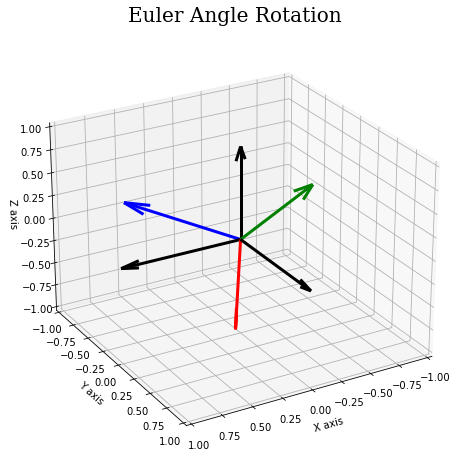

In [304]:
 
# 3D representation of the orthogonal vectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

 
# Plot the orthonormal basis vectors.
ax.quiver(0, 0, 0, 1, 0, 0, color = 'black', lw=3, arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1, 0, color = 'black', lw=3, arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1, color = 'black', lw=3, arrow_length_ratio=0.15)


# Plot the rotated vectors.
ax.quiver( 0, 0, 0, R[1][0][0], R[1][0][1], R[1][0][2], color = 'r', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, R[1][1][0], R[1][1][1], R[1][1][2], color = 'g', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, R[1][2][0], R[1][2][1], R[1][2][2], color = 'b', lw=3, arrow_length_ratio=0.2)


font = {'family':'serif','color':'black','size':20}
ax.set_xlim([-1, 1]), ax.set_zlim([-1, 1]), ax.set_ylim([-1, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.title("Euler Angle Rotation", fontdict = font)
ax.view_init(25,60)
plt.show()